This notebook will try to get the model to overfit on a single batch

In [63]:
import json
import pickle
import os

In [64]:
os.chdir('/sietch_colab/akapoor/Demographic_Inference')

In [65]:
from src.models import ShallowNN
from src.train import MLPTrainer
from src.utils import plot_loss_curves

In [66]:
model_config_file = '/sietch_colab/akapoor/Demographic_Inference/model_config.json' 
features_file = '/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_1000_sims_inference_5_seed_42_num_replicates_10_top_values_5/features_and_targets.pkl'
color_shades = '/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_1000_sims_inference_5_seed_42_num_replicates_10_top_values_5/color_shades.pkl'
main_colors = '/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_1000_sims_inference_5_seed_42_num_replicates_10_top_values_5/main_colors.pkl'

In [67]:
# Load model config
with open(model_config_file, "r") as f:
    model_config = json.load(f)

# Load features
with open(features_file, "rb") as f:
    features = pickle.load(f)

# Load the list back
with open(color_shades, "rb") as f:
    color_shades = pickle.load(f)

with open(main_colors, "rb") as f:
    main_colors = pickle.load(f)

mdl = ShallowNN(
    input_size=model_config["neural_net_hyperparameters"]["input_size"],
    hidden_sizes=model_config["neural_net_hyperparameters"]["hidden_size"],
    num_layers=model_config["neural_net_hyperparameters"]["num_layers"],
    output_size=model_config["neural_net_hyperparameters"]["output_size"],
    learning_rate=model_config["neural_net_hyperparameters"]["learning_rate"],
    weight_decay=model_config["neural_net_hyperparameters"]["weight_decay"],
    dropout_rate=model_config["neural_net_hyperparameters"]["dropout_rate"],
    BatchNorm=model_config["neural_net_hyperparameters"]["BatchNorm"],
)


In [68]:
experiment_directory = '/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_5_top_values_5'

In [60]:
trainer = MLPTrainer(
    experiment_directory,
    model_config,
    color_shades,
    main_colors,
    param_names=model_config["neural_net_hyperparameters"]["parameter_names"]
)

In [69]:
features['training']['features']

array([[ 7177.67357824,  2319.63463096,  8004.61438738, ...,
         7507.50046902,  2172.47041452,  1364.47484037],
       [ 9140.80022   ,  2164.75016383,  6002.3770957 , ...,
         6938.10460506,  2865.5253481 ,  1665.39065757],
       [ 7726.01127786,  4403.81015658, 10655.71228931, ...,
         8010.952207  ,  4678.69847695,  2734.7226658 ],
       ...,
       [ 7572.69092853,  2769.56663791,  7552.44062634, ...,
         4579.14893607,  2068.11122524,  1286.45873262],
       [ 7504.77977848,  4138.30148393,  9380.67198483, ...,
         6583.93420085,  2904.67055415,  2294.55169009],
       [ 7707.13871458,  2851.90513744,  8679.56140001, ...,
         9378.34119417,  3119.47933808,  1711.04188565]])

In [70]:
import matplotlib.pyplot as plt

In [71]:
features['validation']['features'].shape

(500, 50)

In [72]:
features['validation']['targets']

array([[-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       ...,
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506]])

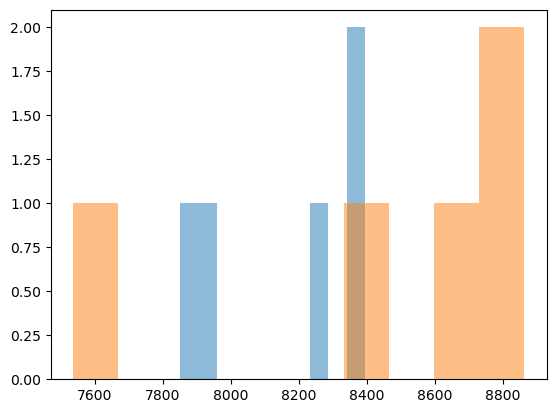

In [21]:
plt.figure()
plt.hist(features['training']['features'][:,0], alpha = 0.5)
plt.hist(features['validation']['features'][:,0], alpha = 0.5)
plt.show()

In [22]:
with open('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/postprocessing_results.pkl', 'rb') as f:
    postprocessing_results = pickle.load(f)

In [23]:
postprocessing_results['training']['predictions']

array([[8.24186548e+03, 4.54082463e+03, 5.24241959e+03, 1.04305373e+03,
        4.75169815e+02, 8.69856576e+03, 3.75463639e+03, 6.88614076e+03,
        1.78044605e+03, 8.93299303e+02, 7.23582652e+03, 3.44525671e+03,
        1.00165984e+04, 9.63044796e+02, 2.00560571e+02, 1.50013278e+04,
        3.32650645e+03, 7.93016727e+03, 6.07178210e+03, 5.25426086e+03,
        7.80650934e+03, 2.63018017e+03, 1.02321743e+04, 6.38077424e+02,
        2.46776474e+02, 1.51717133e+04, 2.16625169e+03, 1.29161662e+04,
        4.61012120e+03, 3.49745836e+03, 7.78884556e+03, 5.30784247e+03,
        7.14558056e+03, 2.51849781e+03, 9.02920876e+02, 1.06618159e+04,
        3.70900725e+03, 6.14550097e+03, 2.88066340e+03, 2.34519590e+03,
        7.53265273e+03, 2.06705083e+03, 6.69850342e+03, 9.62127894e+02,
        1.50653055e+00, 8.68488390e+03, 3.80474687e+03, 7.00346708e+03,
        1.54880621e+03, 8.90415357e+02],
       [8.36043720e+03, 3.80698070e+03, 5.73341692e+03, 1.21936695e+03,
        6.41231447e+02,

In [40]:
with open('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/preprocessing_results_obj.pkl', 'rb') as f:
    preprocessing_results = pickle.load(f)

In [42]:
preprocessing_results['training']['targets']

(5, 5, 2, 5)

In [43]:
import numpy as np
training_targets = np.load('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/training_targets.npy')

In [44]:
training_targets

array([[8477, 4085, 6365, 1963,  921],
       [8840, 4265, 6047, 1979,  843],
       [8726, 4867, 6178, 1628,  849],
       [9900, 4168, 6456, 1605,  893],
       [8906, 4411, 6936, 1647,  962]])

In [47]:
with open('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/simulation_results/software_inferences_sim_0.pkl', 'rb') as f:
    simulation_results = pickle.load(f)

In [48]:
simulation_results

{'simulated_params': {'N0': 8726,
  'Nb': 4867,
  'N_recover': 6178,
  't_bottleneck_start': 1628,
  't_bottleneck_end': 849},
 'sfs': Spectrum([-- 394.0 163.0 103.0 79.0 67.0 54.0 69.0 66.0 55.0 75.0 55.0 37.0 41.0
  29.0 16.0 19.0 27.0 11.0 27.0 34.0 27.0 16.0 14.0 10.0 13.0 10.0 21.0
  15.0 6.0 26.0 5.0 9.0 10.0 6.0 9.0 12.0 19.0 5.0 16.0 --], folded=False, pop_ids=None),
 'model_sfs_dadi': [Spectrum([-- 417.11045984236506 172.43816646445575 106.66154645721203
   79.67911724164284 65.67686104397806 57.078922599590776 51.09744101185392
   46.549298101231805 42.87551165628766 39.78674705680806 37.12024320593711
   34.777052877025014 32.69258127093979 30.821909898784604
   29.132072416426716 27.597780695204946 26.19895231446665
   24.919209853060753 23.744915684980704 22.664521477894386
   21.66812297865069 20.747149895084874 19.89413480727956 19.102528025409878
   18.36655003034464 17.681079264442204 17.041564870643906
   16.443951948464456 15.884615567493082 15.360305837818803
   14.

In [49]:
with open('/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_10_top_values_5/simulation_results/sampled_params_1.pkl', 'rb') as f:
    sampled_params = pickle.load(f)

In [50]:
sampled_params

{'N0': 8477,
 'Nb': 4085,
 'N_recover': 6365,
 't_bottleneck_start': 1963,
 't_bottleneck_end': 921}

In [53]:
features['training']['features']

array([[8.24186548e+03, 4.54082463e+03, 5.24241959e+03, 1.04305373e+03,
        4.75169815e+02, 8.69856576e+03, 3.75463639e+03, 6.88614076e+03,
        1.78044605e+03, 8.93299303e+02, 7.23582652e+03, 3.44525671e+03,
        1.00165984e+04, 9.63044796e+02, 2.00560571e+02, 1.50013278e+04,
        3.32650645e+03, 7.93016727e+03, 6.07178210e+03, 5.25426086e+03,
        7.80650934e+03, 2.63018017e+03, 1.02321743e+04, 6.38077424e+02,
        2.46776474e+02, 1.51717133e+04, 2.16625169e+03, 1.29161662e+04,
        4.61012120e+03, 3.49745836e+03, 7.78884556e+03, 5.30784247e+03,
        7.14558056e+03, 2.51849781e+03, 9.02920876e+02, 1.06618159e+04,
        3.70900725e+03, 6.14550097e+03, 2.88066340e+03, 2.34519590e+03,
        7.53265273e+03, 2.06705083e+03, 6.69850342e+03, 9.62127894e+02,
        1.50653055e+00, 8.68488390e+03, 3.80474687e+03, 7.00346708e+03,
        1.54880621e+03, 8.90415357e+02],
       [8.36043720e+03, 3.80698070e+03, 5.73341692e+03, 1.21936695e+03,
        6.41231447e+02,

In [17]:
snn_model, train_losses, val_losses = trainer.train(
    model = mdl,
    X_train = features["training"]["features"],
    y_train = features["training"]["targets"],
    X_val = features["validation"]["features"],
    y_val = features["validation"]["targets"],
)


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
Initializing distributed: GLOBAL_RANK: 0, MEMBER: 1/3
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=84` in the `DataLoader` to improve performance.
/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=84` in the `DataLoader` to improve performance.
/home/akapoor/miniconda3/envs/myenv/lib/python3.10/site-packages/pytorch_lightning/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


In [19]:
plot_loss_curves(train_losses, val_losses, experiment_directory)

In [20]:
experiment_directory

'/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_5_top_values_5'

In [75]:
features['training']['features']

array([[-0.30661174,  0.6783106 ,  0.41842069, ...,  0.0472949 ,
        -0.91726711, -1.10616859],
       [ 1.24474036, -1.05958908, -0.98406993, ...,  0.75079183,
         0.83738236,  0.52348808],
       [ 0.58826214,  0.16167713,  0.31281615, ..., -0.45267073,
         0.72489358,  0.42571875],
       ...,
       [-0.40243157, -0.36797414,  1.41116303, ...,  0.53422862,
         1.6536881 ,  1.51003804],
       [ 0.87027525,  1.26139207, -0.4534563 , ...,  1.73377526,
         2.17081406,  2.17025615],
       [ 0.05619955, -1.0675189 ,  0.85344919, ..., -1.16159225,
        -0.82709128, -1.01040817]])

Linear regression model

In [54]:
## LINEAR REGRESSION
from src.models import LinearReg
experiment_config = '/sietch_colab/akapoor/Demographic_Inference/experiment_config.json'
with open(experiment_config, "r") as f:
    experiment_config = json.load(f)


linear_mdl = LinearReg(
    training_features=features["training"]["features"],
    training_targets=features["training"]["targets"],
    validation_features=features["validation"]["features"],
    validation_targets=features["validation"]["targets"],
)

training_predictions, validation_predictions = (
    linear_mdl.train_and_validate()
)

print(f'PREDICTIONS SHAPE TRAINING: {training_predictions.shape}')



linear_mdl_obj = linear_mdl.organizing_results(
    features,
    training_predictions,
    validation_predictions
)

linear_mdl_obj["param_names"] = experiment_config["parameter_names"]

PREDICTIONS SHAPE TRAINING: (5, 5)


In [55]:
validation_predictions

array([[-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506]])

In [56]:
training_predictions

array([[-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506],
       [-0.43474475,  1.55884573,  0.80020747,  0.33948196, -1.19511506]])

In [79]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [80]:
# Step 1: Initialize the linear regression model
model = LinearRegression()

# Step 2: Fit the model on the training data
model.fit(features['training']['features'], features['training']['targets'])

# Step 3: Make predictions on training and validation sets
train_predictions = model.predict(features['training']['features'])
val_predictions = model.predict(features['validation']['features'])


In [82]:
val_predictions

array([[-0.40773529,  1.53183626,  0.80695984,  0.34285814, -1.24913398],
       [-0.45881629,  1.58291726,  0.79418959,  0.33647302, -1.14697198],
       [-0.46255419,  1.58665516,  0.79325511,  0.33600578, -1.13949619],
       [-0.44114761,  1.56524859,  0.79860676,  0.3386816 , -1.18230934],
       [-0.44920837,  1.57330935,  0.79659157,  0.33767401, -1.16618782],
       [-0.46135972,  1.58546069,  0.79355373,  0.33615509, -1.14188513],
       [-0.43060493,  1.5547059 ,  0.80124243,  0.33999944, -1.20339471],
       [-0.40669609,  1.53079706,  0.80721964,  0.34298804, -1.25121238],
       [-0.46121642,  1.5853174 ,  0.79358956,  0.336173  , -1.14217172],
       [-0.39556052,  1.5196615 ,  0.81000353,  0.34437999, -1.27348352],
       [-0.47151068,  1.59561165,  0.79101599,  0.33488622, -1.12158321],
       [-0.45465545,  1.57875642,  0.7952298 ,  0.33699312, -1.15529367],
       [-0.5085243 ,  1.63262528,  0.78176259,  0.33025951, -1.04755596],
       [-0.43779823,  1.5618992 ,  0.7

FileNotFoundError: [Errno 2] No such file or directory: '/sietch_colab/akapoor/Demographic_Inference/bottleneck_experiments_seed_42/sims/sims_pretrain_10_sims_inference_5_seed_42_num_replicates_5_top_values_5/linear_results.png'

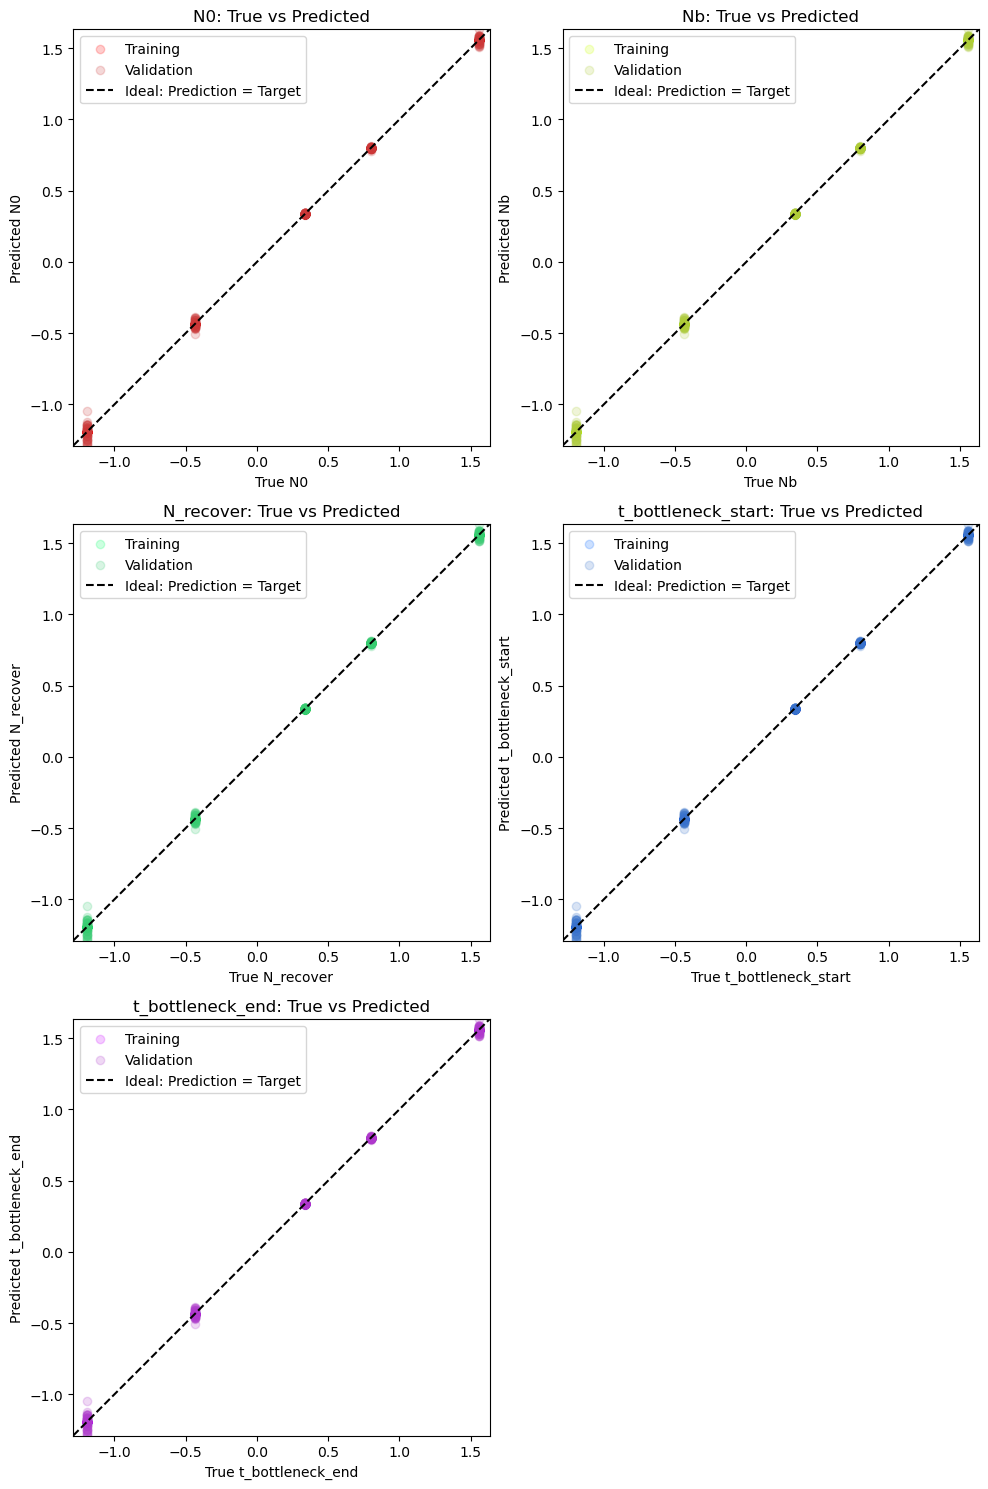

In [84]:
from src.utils import visualizing_results

# targets
visualizing_results(
    linear_mdl_obj,
    "linear_results",
    save_loc=experiment_directory,
    stages=["training", "validation"],
    color_shades=color_shades,
    main_colors=main_colors,
)